# Project 9

A Data Analysis of Your Own:
* An investigation into how **distance to abortion providers** has changed for each county in the United States from _2009-2022_
* Data Source: https://osf.io/8dg7r/

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import colorcet as cc

_Read abortion dataset into a dataframe_

In [45]:
df = pd.read_csv("2022.12.01_abortionaccess_countyxmonth.csv")
df.head()

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,dest_loc_id,dest_loc_name,dest_loc_type,distance_origintodest,distance_type,dest_loc_numfacs,dest_asp
0,1001,Autauga County (AL),AL,11302.0,588,2009,1,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
1,1001,Autauga County (AL),AL,11302.0,589,2009,2,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
2,1001,Autauga County (AL),AL,11302.0,590,2009,3,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
3,1001,Autauga County (AL),AL,11302.0,591,2009,4,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0
4,1001,Autauga County (AL),AL,11302.0,592,2009,5,1101,Montgomery County (AL),AL,33860,"Montgomery, AL",CBSA,17.593504,Travel (HERE API),2,89495.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527856 entries, 0 to 527855
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   origin_fips_code       527856 non-null  int64  
 1   origin_county_name     527856 non-null  object 
 2   origin_state           527856 non-null  object 
 3   origin_population      522144 non-null  float64
 4   monthlydate            527856 non-null  int64  
 5   year                   527856 non-null  int64  
 6   month                  527856 non-null  int64  
 7   dest_fips_code         527856 non-null  int64  
 8   dest_county_name       527856 non-null  object 
 9   dest_state             527856 non-null  object 
 10  dest_loc_id            527856 non-null  int64  
 11  dest_loc_name          527856 non-null  object 
 12  dest_loc_type          527856 non-null  object 
 13  distance_origintodest  527856 non-null  float64
 14  distance_type          527856 non-nu

_Sort values by the **distance_origintodest** column which measures the distance in miles from the origin county to the destination county_

In [47]:
df.sort_values("distance_origintodest", ascending=False).head(15)

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,dest_loc_id,dest_loc_name,dest_loc_type,distance_origintodest,distance_type,dest_loc_numfacs,dest_asp
11425,2016,Aleutians West Census Area (AK),AK,NaN,750,2022,7,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11428,2016,Aleutians West Census Area (AK),AK,NaN,753,2022,10,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11430,2016,Aleutians West Census Area (AK),AK,NaN,755,2022,12,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11429,2016,Aleutians West Census Area (AK),AK,NaN,754,2022,11,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11424,2016,Aleutians West Census Area (AK),AK,NaN,749,2022,6,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11427,2016,Aleutians West Census Area (AK),AK,NaN,752,2022,9,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
11426,2016,Aleutians West Census Area (AK),AK,NaN,751,2022,8,2020,Anchorage Borough (AK),AK,11260,"Anchorage, AK",CBSA,838.75250,Geodesic,1,NaN
428906,48061,Cameron County (TX),TX,84793.0,752,2022,9,35013,Dona Ana County (NM),NM,29740,"Las Cruces, NM",CBSA,831.18896,Travel (HERE API),3,488847.66
428909,48061,Cameron County (TX),TX,84793.0,755,2022,12,35013,Dona Ana County (NM),NM,29740,"Las Cruces, NM",CBSA,831.18896,Travel (HERE API),4,365921.25
428908,48061,Cameron County (TX),TX,84793.0,754,2022,11,35013,Dona Ana County (NM),NM,29740,"Las Cruces, NM",CBSA,831.18896,Travel (HERE API),4,365921.25


_The county located at the greatest distance from an abortion provider is **Aleutians West Census Area, Alaska**. The distance in July 2022 to the nearest provider was **838.852 miles**._ 

In [48]:
df.sort_values("distance_origintodest").head(15)

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,dest_loc_id,dest_loc_name,dest_loc_type,distance_origintodest,distance_type,dest_loc_numfacs,dest_asp
56279,12031,Duval County (FL),FL,188039.0,647,2013,12,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56278,12031,Duval County (FL),FL,188039.0,646,2013,11,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56277,12031,Duval County (FL),FL,188039.0,645,2013,10,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56276,12031,Duval County (FL),FL,188039.0,644,2013,9,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56274,12031,Duval County (FL),FL,188039.0,642,2013,7,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56273,12031,Duval County (FL),FL,186592.0,594,2009,7,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,82549.750
56275,12031,Duval County (FL),FL,188039.0,643,2013,8,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,83439.750
56271,12031,Duval County (FL),FL,186592.0,592,2009,5,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,82549.750
56270,12031,Duval County (FL),FL,186592.0,591,2009,4,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,82549.750
56269,12031,Duval County (FL),FL,186592.0,590,2009,3,12031,Duval County (FL),FL,27260,"Jacksonville, FL",CBSA,0.176469,Travel (HERE API),4,82549.750


_The county located at the closest distance from an abortion provider is **Duval County, Florida**. The distance in December 2013 to the nearest provider was **0.176 miles**._ 

_Although the dataframe identifies each county by its name and fips code, it's lacking latitude and longtidue coordinates. To add this missing data, I merged this dataframe with a dataset containing more identifiers for each county, including such coordinates. Source = https://simplemaps.com/data/us-counties_

In [49]:
counties = pd.read_csv("uscounties.csv")
counties.sort_values("county").head()

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
1627,Abbeville,Abbeville,Abbeville County,45001,SC,South Carolina,34.2226,-82.4593,24374
895,Acadia,Acadia,Acadia Parish,22001,LA,Louisiana,30.2906,-92.4120,58200
1340,Accomack,Accomack,Accomack County,51001,VA,Virginia,37.7643,-75.6332,33388
146,Ada,Ada,Ada County,16001,ID,Idaho,43.4511,-116.2412,485246
1823,Adair,Adair,Adair County,40001,OK,Oklahoma,35.8839,-94.6587,19839


_I added a new column concatenating the **county_full** and **state_id** columns such that the county naming convention in the counties data frame is the same as that used in the abortion data frame. This step will allow me to merge the data frames._

In [50]:
counties["origin_county_name"] = counties["county_full"] + " (" + counties["state_id"] + ")"
counties

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,origin_county_name
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635,Los Angeles County (CA)
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398,Cook County (IL)
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957,Harris County (TX)
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186,Maricopa County (AZ)
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317,San Diego County (CA)
...,...,...,...,...,...,...,...,...,...,...
3138,Blaine,Blaine,Blaine County,31009,NE,Nebraska,41.9128,-99.9767,346,Blaine County (NE)
3139,King,King,King County,48269,TX,Texas,33.6165,-100.2558,229,King County (TX)
3140,Kenedy,Kenedy,Kenedy County,48261,TX,Texas,26.9285,-97.7017,169,Kenedy County (TX)
3141,Loving,Loving,Loving County,48301,TX,Texas,31.8493,-103.5800,83,Loving County (TX)


_I merged the abortion and counties data frames on the **origin_county_name** column. This step effectively added latitude and longitude coordinates for each county to the abortion data frame._ 

In [51]:
df = pd.merge(df, counties, how='left')
df

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,...,dest_asp,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,1001,Autauga County (AL),AL,11302.0,588,2009,1,1101,Montgomery County (AL),AL,...,89495.0,Autauga,Autauga,Autauga County,1001.0,AL,Alabama,32.5349,-86.6427,58239.0
1,1001,Autauga County (AL),AL,11302.0,589,2009,2,1101,Montgomery County (AL),AL,...,89495.0,Autauga,Autauga,Autauga County,1001.0,AL,Alabama,32.5349,-86.6427,58239.0
2,1001,Autauga County (AL),AL,11302.0,590,2009,3,1101,Montgomery County (AL),AL,...,89495.0,Autauga,Autauga,Autauga County,1001.0,AL,Alabama,32.5349,-86.6427,58239.0
3,1001,Autauga County (AL),AL,11302.0,591,2009,4,1101,Montgomery County (AL),AL,...,89495.0,Autauga,Autauga,Autauga County,1001.0,AL,Alabama,32.5349,-86.6427,58239.0
4,1001,Autauga County (AL),AL,11302.0,592,2009,5,1101,Montgomery County (AL),AL,...,89495.0,Autauga,Autauga,Autauga County,1001.0,AL,Alabama,32.5349,-86.6427,58239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527851,56045,Weston County (WY),WY,1031.0,751,2022,8,8069,Larimer County (CO),CO,...,142533.0,Weston,Weston,Weston County,56045.0,WY,Wyoming,43.8404,-104.5677,6891.0
527852,56045,Weston County (WY),WY,1031.0,752,2022,9,8069,Larimer County (CO),CO,...,142533.0,Weston,Weston,Weston County,56045.0,WY,Wyoming,43.8404,-104.5677,6891.0
527853,56045,Weston County (WY),WY,1031.0,753,2022,10,8069,Larimer County (CO),CO,...,142730.0,Weston,Weston,Weston County,56045.0,WY,Wyoming,43.8404,-104.5677,6891.0
527854,56045,Weston County (WY),WY,1031.0,754,2022,11,8069,Larimer County (CO),CO,...,142730.0,Weston,Weston,Weston County,56045.0,WY,Wyoming,43.8404,-104.5677,6891.0


_The next step I took was to group my data frame by year, so that I could investigate how the distances to providers have changed by year from 2009 to 2022._  

In [52]:
df_year = df.groupby(["year", "origin_county_name"]).mean()
df_year

origin_fips_code  origin_population  monthlydate  \
year origin_county_name                                                        
2009 Abbeville County (SC)           45001.0             4665.0        593.5   
     Acadia Parish (LA)              22001.0            12128.0        593.5   
     Accomack County (VA)            51001.0             5621.0        593.5   
     Ada County (ID)                 16001.0            80606.0        593.5   
     Adair County (IA)               19001.0             1138.0        593.5   
...                                      ...                ...          ...   
2022 Yuma County (AZ)                 4027.0            38946.0        749.5   
     Yuma County (CO)                 8125.0             1673.0        749.5   
     Zapata County (TX)              48505.0             2792.0        749.5   
     Zavala County (TX)              48507.0             2287.0        749.5   
     Ziebach County (SD)             46137.0              585.0        749.5   

                            month  dest_fips_code   dest_loc_id  \
year origin_county_name                                           
2009 Abbeville County (SC)    6.5    45045.000000  24860.000000   
     Acadia Parish (LA)       6.5    22033.000000  12940.000000   
     Accomack County (VA)     6.5    51710.000000  47260.000000   
     Ada County (ID)          6.5    16001.000000  14260.000000   
     Adair County (IA)        6.5    19164.000000  19477.500000   
...                           ...             ...           ...   
2022 Yuma County (AZ)         6.5     6025.000000  20940.000000   
     Yuma County (CO)         6.5     8115.333333  24140.000000   
     Zapata County (TX)       6.5    40531.000000  32293.333333   
     Zavala County (TX)       6.5    41521.000000  35720.000000   
     Ziebach County (SD)      6.5    38394.666667  32820.000000   

                            distance_origintodest  dest_loc_numfacs  \
year origin_county_name                                               
2009 Abbeville County (SC)              46.842690          1.000000   
     Acadia Parish (LA)                 84.368538          1.000000   
     Accomack County (VA)               76.964897          5.000000   
     Ada County (ID)                     6.552359          2.000000   
     Adair County (IA)                  44.565364          1.000000   
...                                           ...               ...   
2022 Yuma County (AZ)                   66.305275          1.000000   
     Yuma County (CO)                  133.522369          1.583333   
     Zapata County (TX)                374.675741          2.000000   
     Zavala County (TX)                324.923690          3.083333   
     Ziebach County (SD)               358.090933          1.000000   

                                 dest_asp  county_fips      lat       lng  \
year origin_county_name                                                     
2009 Abbeville County (SC)  292929.000000      45001.0  34.2226  -82.4593   
     Acadia Parish (LA)     359771.000000      22001.0  30.2906  -92.4120   
     Accomack County (VA)    81487.398000      51001.0  37.7643  -75.6332   
     Ada County (ID)         72876.500000      16001.0  43.4511 -116.2412   
     Adair County (IA)       85835.000000      19001.0  41.3307  -94.4710   
...                                   ...          ...      ...       ...   
2022 Yuma County (AZ)       156920.000000       4027.0  32.7695 -113.9056   
     Yuma County (CO)        97255.864583       8125.0  40.0029 -102.4243   
     Zapata County (TX)     854612.792500      48505.0  27.0008  -99.1686   
     Zavala County (TX)     326946.459167      48507.0  28.8662  -99.7605   
     Ziebach County (SD)    179900.833333      46137.0  44.9804 -101.6658   

                            population  
year origin_county_name                 
2009 Abbeville County (SC)     24374.0  
     Acadia Parish (LA)        58200.0  
     Accomack County (VA)

_Upon working in **Observable** to create a map of the distance to a provider for each respective county, it became evident to me that the **fips** column was not in the proper format tht Observable recognized. Specifically, for each fips value the decimal needed to be removed, it needed to be converted to a string, and values with 4 digits needed to have a leading zero added._

In [53]:
df_year["id1"] = df_year['origin_fips_code'].astype(int)
df_year["id2"] = df_year["id1"].astype(str)
array1 = []
for index, row in df_year.iterrows():
    if len(row["id2"]) == 4:
        row["id2"] = "0" + row["id2"]
    array1.append(row["id2"])

df_year['id'] = array1
df_year

origin_fips_code  origin_population  monthlydate  \
year origin_county_name                                                        
2009 Abbeville County (SC)           45001.0             4665.0        593.5   
     Acadia Parish (LA)              22001.0            12128.0        593.5   
     Accomack County (VA)            51001.0             5621.0        593.5   
     Ada County (ID)                 16001.0            80606.0        593.5   
     Adair County (IA)               19001.0             1138.0        593.5   
...                                      ...                ...          ...   
2022 Yuma County (AZ)                 4027.0            38946.0        749.5   
     Yuma County (CO)                 8125.0             1673.0        749.5   
     Zapata County (TX)              48505.0             2792.0        749.5   
     Zavala County (TX)              48507.0             2287.0        749.5   
     Ziebach County (SD)             46137.0              585.0        749.5   

                            month  dest_fips_code   dest_loc_id  \
year origin_county_name                                           
2009 Abbeville County (SC)    6.5    45045.000000  24860.000000   
     Acadia Parish (LA)       6.5    22033.000000  12940.000000   
     Accomack County (VA)     6.5    51710.000000  47260.000000   
     Ada County (ID)          6.5    16001.000000  14260.000000   
     Adair County (IA)        6.5    19164.000000  19477.500000   
...                           ...             ...           ...   
2022 Yuma County (AZ)         6.5     6025.000000  20940.000000   
     Yuma County (CO)         6.5     8115.333333  24140.000000   
     Zapata County (TX)       6.5    40531.000000  32293.333333   
     Zavala County (TX)       6.5    41521.000000  35720.000000   
     Ziebach County (SD)      6.5    38394.666667  32820.000000   

                            distance_origintodest  dest_loc_numfacs  \
year origin_county_name                                               
2009 Abbeville County (SC)              46.842690          1.000000   
     Acadia Parish (LA)                 84.368538          1.000000   
     Accomack County (VA)               76.964897          5.000000   
     Ada County (ID)                     6.552359          2.000000   
     Adair County (IA)                  44.565364          1.000000   
...                                           ...               ...   
2022 Yuma County (AZ)                   66.305275          1.000000   
     Yuma County (CO)                  133.522369          1.583333   
     Zapata County (TX)                374.675741          2.000000   
     Zavala County (TX)                324.923690          3.083333   
     Ziebach County (SD)               358.090933          1.000000   

                                 dest_asp  county_fips      lat       lng  \
year origin_county_name                                                     
2009 Abbeville County (SC)  292929.000000      45001.0  34.2226  -82.4593   
     Acadia Parish (LA)     359771.000000      22001.0  30.2906  -92.4120   
     Accomack County (VA)    81487.398000      51001.0  37.7643  -75.6332   
     Ada County (ID)         72876.500000      16001.0  43.4511 -116.2412   
     Adair County (IA)       85835.000000      19001.0  41.3307  -94.4710   
...                                   ...          ...      ...       ...   
2022 Yuma County (AZ)       156920.000000       4027.0  32.7695 -113.9056   
     Yuma County (CO)        97255.864583       8125.0  40.0029 -102.4243   
     Zapata County (TX)     854612.792500      48505.0  27.0008  -99.1686   
     Zavala County (TX)     326946.459167      48507.0  28.8662  -99.7605   
     Ziebach County (SD)    179900.833333      46137.0  44.9804 -101.6658   

                            population    id1    id2     id  
year origin_county_name                                      
2009 Abbeville County (SC)     24374.0  45001  45001  45001  
   

#### Question 1:

How has access to abortion providers changed for each county in the United States over the years 2009 - 2022?

_Now the data frame is in the proper format (with all the necessary columns) to be exported as a csv and uploaded in Observable to produce a series of **visualizations** that answer the question above: https://observablehq.com/d/e7aea767c5b5deee_

In [54]:
df_year.to_csv("allData.csv")

#### Question 2:

How has access to abortion providers changed since the overturning of Roe vs. Wade?

_Looking at my Observable visualizations, it is evident that in the year 2022 a significant increase in distance to providers occurred in the state of Texas. The visualization below explores this change. Roe vs. Wade was overturned on June 24, 2022. I have indicated this date on the map, and it is evident that the increase in distances to providers occurs directly following this date._ 

In [55]:
df_2022 = df[df["year"] == 2022] 
df_2022_texas = df_2022[df_2022["origin_state"] == 'TX']
df_2022_texas

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,...,dest_asp,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
423864,48001,Anderson County (TX),TX,7746.0,752,2022,9,20173,Sedgwick County (KS),KS,...,2819636.0,Anderson,Anderson,Anderson County,48001.0,TX,Texas,31.8133,-95.6525,58133.0
423865,48001,Anderson County (TX),TX,7746.0,753,2022,10,20173,Sedgwick County (KS),KS,...,2817515.0,Anderson,Anderson,Anderson County,48001.0,TX,Texas,31.8133,-95.6525,58133.0
423866,48001,Anderson County (TX),TX,7746.0,754,2022,11,20173,Sedgwick County (KS),KS,...,2815036.5,Anderson,Anderson,Anderson County,48001.0,TX,Texas,31.8133,-95.6525,58133.0
423867,48001,Anderson County (TX),TX,7746.0,755,2022,12,20173,Sedgwick County (KS),KS,...,2815036.5,Anderson,Anderson,Anderson County,48001.0,TX,Texas,31.8133,-95.6525,58133.0
423868,48001,Anderson County (TX),TX,7746.0,750,2022,7,22017,Caddo Parish (LA),LA,...,5779161.0,Anderson,Anderson,Anderson County,48001.0,TX,Texas,31.8133,-95.6525,58133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466531,48507,Zavala County (TX),TX,2287.0,745,2022,2,48029,Bexar County (TX),TX,...,235233.0,Zavala,Zavala,Zavala County,48507.0,TX,Texas,28.8662,-99.7605,9900.0
466532,48507,Zavala County (TX),TX,2287.0,746,2022,3,48029,Bexar County (TX),TX,...,235233.0,Zavala,Zavala,Zavala County,48507.0,TX,Texas,28.8662,-99.7605,9900.0
466533,48507,Zavala County (TX),TX,2287.0,747,2022,4,48029,Bexar County (TX),TX,...,235233.0,Zavala,Zavala,Zavala County,48507.0,TX,Texas,28.8662,-99.7605,9900.0
466534,48507,Zavala County (TX),TX,2287.0,748,2022,5,48029,Bexar County (TX),TX,...,235233.0,Zavala,Zavala,Zavala County,48507.0,TX,Texas,28.8662,-99.7605,9900.0


In [29]:
df_2022_texas.to_csv("texas2022.csv")

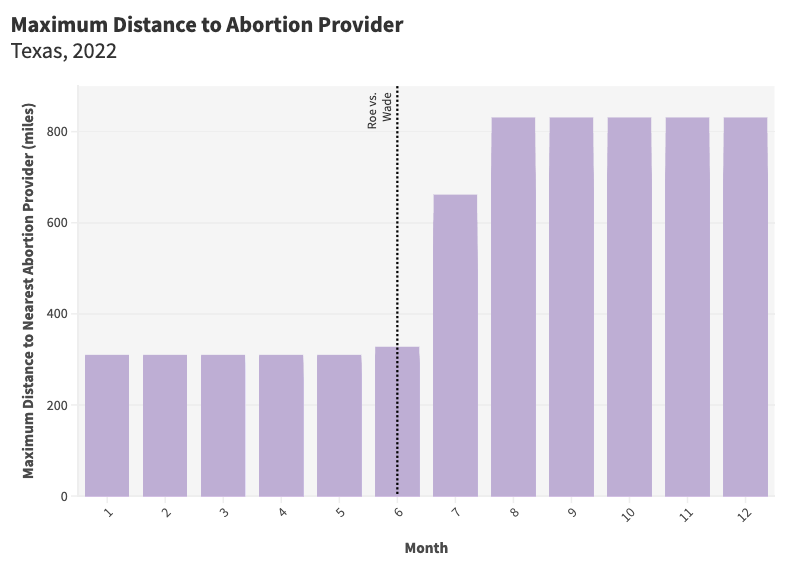

In [30]:
from IPython.display import Image
Image("texas 2022.png")

In [41]:
df_2022_texas_june = df_2022_texas[df_2022_texas["month"] == 6]
df_2022_texas_june = df_2022_texas_june.sort_values("distance_origintodest", ascending=False)
df_2022_texas_june["distance_origintodest"].max()

327.51855

_The maximum distance to an abortion provider in Texas in the month of June, before the overturning of Roe vs. Wade, was **327.51** miles for **Hutchinson County**_

In [61]:
df_2022_texas_august = df_2022_texas[df_2022_texas["month"] == 8]
df_2022_texas_august = df_2022_texas_august.sort_values("distance_origintodest", ascending=False)
df_2022_texas_august["distance_origintodest"].max()
df_2022_texas_august

,origin_fips_code,origin_county_name,origin_state,origin_population,monthlydate,year,month,dest_fips_code,dest_county_name,dest_state,...,dest_asp,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
428905,48061,Cameron County (TX),TX,84793.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Cameron,Cameron,Cameron County,48061.0,TX,Texas,26.1333,-97.5182,420554.0
464857,48489,Willacy County (TX),TX,3683.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Willacy,Willacy,Willacy County,48489.0,TX,Texas,26.4693,-97.6622,20423.0
441841,48215,Hidalgo County (TX),TX,184934.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Hidalgo,Hidalgo,Hidalgo County,48215.0,TX,Texas,26.3969,-98.1812,865677.0
445705,48261,Kenedy County (TX),TX,65.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Kenedy,Kenedy,Kenedy County,48261.0,TX,Texas,26.9285,-97.7017,169.0
446713,48273,Kleberg County (TX),TX,7015.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Kleberg,Kleberg,Kleberg County,48273.0,TX,Texas,27.4337,-97.7273,31015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449086,48301,Loving County (TX),TX,32.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Loving,Loving,Loving County,48301.0,TX,Texas,31.8493,-103.5800,83.0
444214,48243,Jeff Davis County (TX),TX,276.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Jeff Davis,Jeff Davis,Jeff Davis County,48243.0,TX,Texas,30.7154,-104.1400,2021.0
432958,48109,Culberson County (TX),TX,347.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Culberson,Culberson,Culberson County,48109.0,TX,Texas,31.4470,-104.5173,2209.0
443038,48229,Hudspeth County (TX),TX,992.0,751,2022,8,35013,Dona Ana County (NM),NM,...,488847.66,Hudspeth,Hudspeth,Hudspeth County,48229.0,TX,Texas,31.4562,-105.3865,3322.0


_The maximum distance to an abortion provider in Texas, following the overturning of Roe vs. Wade, in the month of August was **831.18** miles for **Cameron County**_

In [70]:
df_2022_texas_august_cameron = df_2022_texas_august[df_2022_texas_august["origin_county_name"] == "Cameron County (TX)"]
df_2022_texas_august_cameron["distance_origintodest"]

428905    831.18896
Name: distance_origintodest, dtype: float64

In [72]:
df_2022_texas_june_cameron = df_2022_texas_june[df_2022_texas_june["origin_county_name"] == "Cameron County (TX)"]
df_2022_texas_june_cameron["distance_origintodest"]

429068    50.832512
Name: distance_origintodest, dtype: float64

In [75]:
831.18896 - 50.832512

780.356448

For residents of Cameron County, the overturning of Roe vs. Wade meant that the distance to the nearest abortion provider increased by **780** miles, going from **50.83** miles to **831.18** miles. 

In [79]:
df_2022_texas_cameron = df_2022_texas[df_2022_texas["origin_county_name"] == "Cameron County (TX)"]
df_2022_texas_cameron.to_csv("cameronCounty.csv")

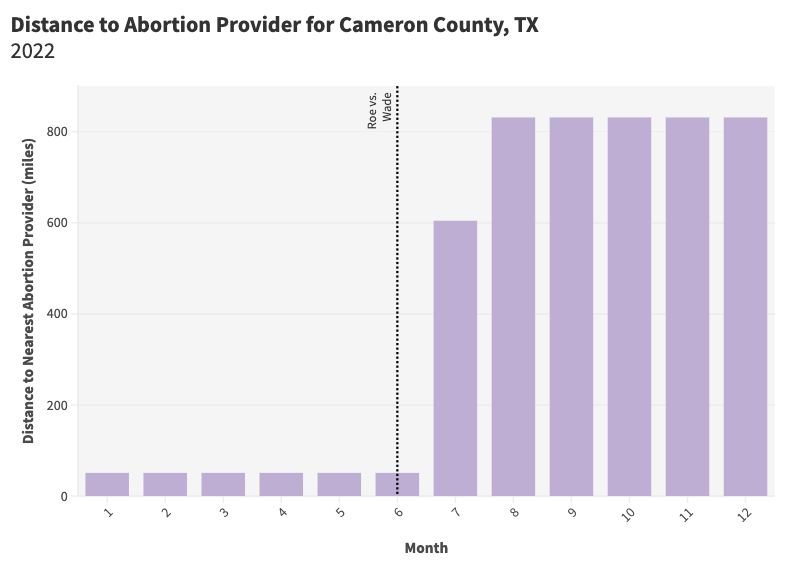

In [80]:
Image("cameron county.png")